### Analyzing Word Frequencies in Text
Objectives:
- Calculating basic statistics of word frequencies
- Visualize the frequency distribution of common words
- Compare observed word frequencies with expected distributions
- Draw insights about word usage pattern in the dataset

In [12]:
# Load and preprocess text data
import re # allows you to use regular expressions (regex) in Python.
import nltk
nltk.download('punkt')
import spacy
import gensim
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora
from gensim.models import LdaModel


[nltk_data] Downloading package punkt to /home/wanyua/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Load SpaCy's English model
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('average_perceptron_tagger')
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /home/wanyua/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/wanyua/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/wanyua/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
# Sample text for analysis
text = """
Over the past decade, smart devices have transformed the way we interact with technology. From smartphones to smart home assistants, these gadgets have become an essential part of our daily lives.
Many users appreciate the convenience and efficiency that these devices offer. One customer stated, "My smart speaker has completely changed how I control my home. I can now adjust the lights, play music, and even check the weather using just my voice!"
However, some users raise concerns about privacy and data security. A user on a tech forum commented, "I love the features, but I worry about my personal data being collected without my consent." This has led to discussions on the ethical implications of AI-driven smart devices.
Another major factor in customer satisfaction is battery life. While high-end devices promise long-lasting battery performance, some users report inconsistent battery life after months of usage. A reviewer mentioned, "My smartwatch was great for the first three months, but now I need to charge it twice a day."
Despite these concerns, the global demand for smart devices continues to grow. Market research suggests that by 2030, the number of connected devices worldwide will exceed 50 billion. Brands are investing in AI, better privacy controls, and sustainable tech to improve customer trust.
The question remains: Are smart devices making our lives easier, or are we becoming too dependent on technology?
"""

In [7]:
# Preprocessing
def preprocess_text(text, use_lemmatization=True):
    tokenizer = TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalpha()]

    if use_lemmatization:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    else:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

    return tokens

print("\nPreprocessed Tokens:", preprocess_text(text))



Preprocessed Tokens: ['past', 'decade', 'smart', 'device', 'transformed', 'way', 'interact', 'smartphones', 'smart', 'home', 'assistant', 'gadget', 'become', 'essential', 'part', 'daily', 'many', 'user', 'appreciate', 'convenience', 'efficiency', 'device', 'one', 'customer', 'stated', 'smart', 'speaker', 'completely', 'changed', 'control', 'adjust', 'light', 'play', 'music', 'even', 'check', 'weather', 'using', 'voice', 'however', 'user', 'raise', 'concern', 'privacy', 'data', 'user', 'tech', 'forum', 'commented', 'love', 'feature', 'worry', 'personal', 'data', 'collected', 'without', 'led', 'discussion', 'ethical', 'implication', 'smart', 'another', 'major', 'factor', 'customer', 'satisfaction', 'battery', 'device', 'promise', 'battery', 'performance', 'user', 'report', 'inconsistent', 'battery', 'life', 'month', 'reviewer', 'mentioned', 'smartwatch', 'great', 'first', 'three', 'month', 'need', 'charge', 'twice', 'despite', 'concern', 'global', 'demand', 'smart', 'device', 'continues

### Sentiment Analysis
Sentiment Analysis is a Natural Language Processing (NLP) technique used to determine the emotional tone behind a body of text. It classifies text into positive, negative, or neutral sentiments.

In [9]:
# Sentiment analysis
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity  # Ranges from -1 (negative) to 1 (positive)
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"
    
print("\nSentiment Analysis:", sentiment_analysis(text))


Sentiment Analysis: Positive


### Named Entity Recogntion (NER)
Named Entity Recognition (NER) is a Natural Language Processing (NLP) technique used to identify and classify key entities in a text into predefined categories. These entities could be:

- Persons – "Elon Musk", "Albert Einstein"
- Organizations – "Google", "NASA", "Harvard University"
- Locations – "New York", "Mount Everest", "Africa"
- Dates & Time – "January 1, 2024", "last Monday"
- Monetary Values – "$100", "10 euros"
- Products – "iPhone 15", "Tesla Model S"
- Events – "World Cup", "Olympics 2024"
- Other Entities – Percentages, Laws, Medical Conditions, etc.

In [10]:
# Named Entity Recognition(NER)
def extract_entities(text):
    doc = nlp(text)
    entities = {ent.text: ent.label_ for ent in doc.ents}
    return entities

print("\nNamed Entities:", extract_entities(text))


Named Entities: {'the past decade': 'DATE', 'One': 'CARDINAL', 'months': 'DATE', 'the first three months': 'DATE', '2030': 'DATE', '50 billion': 'MONEY', 'AI': 'ORG'}


### Topic Modeling
Topic modeling is an unsupervised machine learning technique used to identify hidden themes or topics in a collection of documents. It is commonly used in text analysis, document clustering, and content classification.

**Why use Topic Modeling?**
- Summarize large volumes of text (e.g., news articles, research papers)
- Organize and categorize documents (e.g., customer feedback, legal documents)
- Extract key themes from unstructured text

**Common Topic Modeling Techniques**
- Latent Dirichlet Allocation (LDA) – A probabilistic model that assumes each document is a mixture of topics
- Non-Negative Matrix Factorization (NMF) – Uses matrix factorization for topic discovery
- Latent Semantic Analysis (LSA) – Uses Singular Value Decomposition (SVD) to detect topics
- BERTopic – A deep-learning-based approach using transformer embedding


In [15]:
def topic_modeling(text):
    tokens = preprocess_text(text)
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]
    lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)
    return lda_model.print_topics()
print("\nTopic Modeling:", topic_modeling(text))




Topic Modeling: [(0, '0.011*"smart" + 0.010*"device" + 0.010*"user" + 0.010*"battery" + 0.010*"customer" + 0.010*"tech" + 0.010*"concern" + 0.010*"data" + 0.010*"privacy" + 0.010*"month"'), (1, '0.038*"device" + 0.038*"smart" + 0.026*"user" + 0.020*"customer" + 0.020*"battery" + 0.015*"life" + 0.015*"control" + 0.015*"month" + 0.015*"privacy" + 0.015*"data"')]


- Two Topics Identified: The model extracted two main topics from the text.
- Each Topic is a Collection of Words:
    - Each topic consists of words with associated weights (probabilities).
    - The weight represents how strongly the word contributes to that topic.

In [16]:
# Word frequency analysis
def word_frequencies(text):
    tokens = preprocess_text(text)
    word_counts = Counter(tokens)
    return word_counts.most_common(10)

print("\nTop Word Frequencies:", word_frequencies(text))


Top Word Frequencies: [('smart', 6), ('device', 6), ('user', 4), ('customer', 3), ('battery', 3), ('control', 2), ('concern', 2), ('privacy', 2), ('data', 2), ('tech', 2)]


In [29]:
import numpy as np 
word_count = word_frequencies(text)
word_count

# Extract only the frequency values (ignore words)
frequencies = [freq for _, freq in word_count]

# Convert to NumPy array
frequencies = np.array(frequencies, dtype=np.float64)

# Compute statistics
mean_freq = np.mean(frequencies)
variance_freq = np.var(frequencies)
std_deviation_freq = np.std(frequencies)

print(f"Mean frequency: {mean_freq}")
print(f"Variance frequency: {variance_freq}")
print(f"Standard deviation frequency: {std_deviation_freq}")

Mean frequency: 3.2
Variance frequency: 2.3600000000000003
Standard deviation frequency: 1.5362291495737217



Top Word Frequencies: [('smart', 6), ('device', 6), ('user', 4), ('customer', 3), ('battery', 3), ('control', 2), ('concern', 2), ('privacy', 2), ('data', 2), ('tech', 2)]


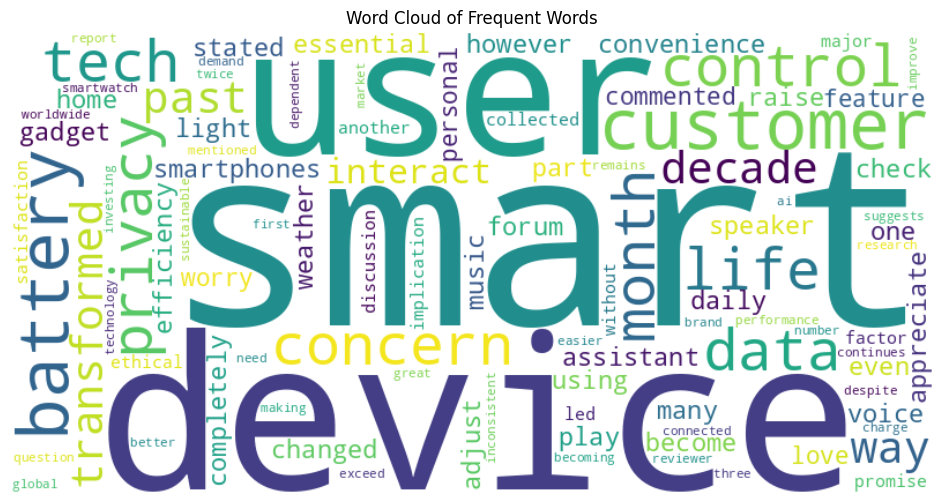

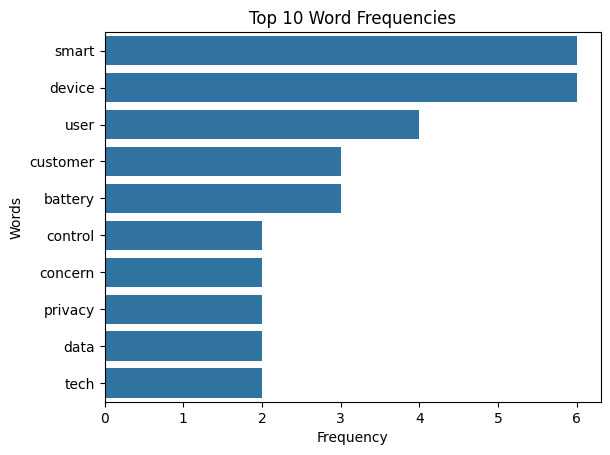

In [17]:
# Visualization - word cloud and frequency distribution
def visualize_word_frequencies(text):
    tokens = preprocess_text(text)
    word_counts = Counter(tokens)

    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("Off")
    plt.title("Word Cloud of Frequent Words")
    plt.show()

    # Bar Plot of Top Words
    common_words = word_counts.most_common(10)
    words, counts = zip(*common_words)
    sns.barplot(x=list(counts), y=list(words))
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title("Top 10 Word Frequencies")
    plt.show()

print("\nTop Word Frequencies:", word_frequencies(text))
visualize_word_frequencies(text)

### Text summarization
Text summarization is a Natural Language Processing (NLP) technique that automatically generates a concise version of a larger text while retaining key information.

Types of Text Summarization:
1. Extractive Summarization
    * Selects important sentences or phrases directly from the text.
    * Example: TextRank (used in SpaCy, Gensim), LexRank
2. Abstractive Summarization
    * Generates new sentences using deep learning (transformers, GPT, BART).
    * Example: T5, Pegasus, BERTSUM

In [20]:
# Text Summarization
def summarize_text(text, num_sentences = 2):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents][:num_sentences]
    return " ".join(sentences)

print("\Text Summary:", summarize_text(text))

\Text Summary: 
Over the past decade, smart devices have transformed the way we interact with technology. From smartphones to smart home assistants, these gadgets have become an essential part of our daily lives.

